<a href="https://colab.research.google.com/github/liuxin85/Image-Generation/blob/main/StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
if not os.path.exists('pytorch_stylegan_encoder'):
    !git clone https://github.com/jacobhallberg/pytorch_stylegan_encoder.git
    %cd pytorch_stylegan_encoder/
    !git submodule update --init --recursive
    !wget -q https://github.com/jacobhallberg/pytorch_stylegan_encoder/releases/download/v1.0/trained_models.zip
    !unzip -q trained_models.zip
    !rm trained_models.zip
    !pip install -qU torch_snippets
    !mv trained_models/stylegan_ffhq.pth InterFaceGAN/models/pretrain
else:
    %cd pytorch_stylegan_encoder
    
from torch_snippets import *

Cloning into 'pytorch_stylegan_encoder'...
remote: Enumerating objects: 358, done.
remote: Total 358 (delta 0), reused 0 (delta 0), pack-reused 358
Receiving objects: 100% (358/358), 56.88 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (185/185), done.
/content/pytorch_stylegan_encoder/pytorch_stylegan_encoder
Submodule 'InterFaceGAN' (git://github.com/ShenYujun/InterFaceGAN.git) registered for path 'InterFaceGAN'
Cloning into '/content/pytorch_stylegan_encoder/pytorch_stylegan_encoder/InterFaceGAN'...
Submodule path 'InterFaceGAN': checked out 'b707e942187f464251f855c92f7009b8cf13bf03'
     |████████████████████████████████| 61kB 4.4MB/s 


2021-03-01 13:56:08.594 | WARNING  | torch_snippets.torch_loader:<module>:232 - Not importing Lightning Report


In [ ]:
#2. Load the pre-trained generator and the synthesis network
from InterFaceGAN.models.stylegan_generator import StyleGANGenerator

In [ ]:
from models.latent_optimizer import PostSynthesisProcessing

In [ ]:
!ls InterFaceGAN/models/pretrain

Pretrained_Models_Should_Be_Placed_Here  stylegan_ffhq.pth


In [ ]:
synthesizer = StyleGANGenerator("stylegan_ffhq").model.synthesis
mapper = StyleGANGenerator("stylegan_ffhq").model.mapping
trunc = StyleGANGenerator("stylegan_ffhq").model.truncation

[2021-03-01 14:08:30,732][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2021-03-01 14:08:31,030][INFO] Successfully loaded!
[2021-03-01 14:08:31,031][INFO]   `lod` of the loaded model is 0.0.
[2021-03-01 14:08:31,367][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2021-03-01 14:08:31,632][INFO] Successfully loaded!
[2021-03-01 14:08:31,633][INFO]   `lod` of the loaded model is 0.0.
[2021-03-01 14:08:31,954][INFO] Loading pytorch model from `InterFaceGAN/models/pretrain/stylegan_ffhq.pth`.
[2021-03-01 14:08:32,230][INFO] Successfully loaded!
[2021-03-01 14:08:32,231][INFO]   `lod` of the loaded model is 0.0.


In [ ]:
#3. Define the function to generate an image from a random vector:
post_processing = PostSynthesisProcessing()
post_porcess = lambda image: post_processing(image).detach().cpu().numpy().astype(np.uint8)[0]

def latent2image(latent):
    img = post_porcess(synthesizer(latent))
    img = img.transpose(1,2,0)
    return img

In [ ]:
#4. Generate a random vector
rand_latents = torch.rand(1, 512).cuda()

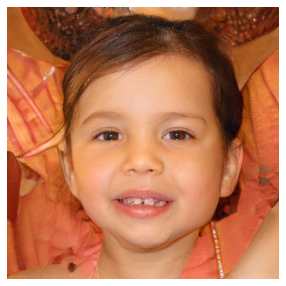

In [ ]:
show(latent2image(trunc(mapper(rand_latents))), sz=5)